In [110]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/workspace')

import os
import pytorch_lightning as pl
from dataclasses import asdict
from pprint import pprint

from src.preare_model import ModelClassifier
from src.prepare_data import ImageDataModule
from config.default import TrainingConfig
from config.list_models import list_models
from config.list_optimizer import ListOptimizer
from src.helper.utils import override_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [116]:

conf = TrainingConfig()
# pprint(asdict(conf))

pl.seed_everything(conf.data.random_seed)
data_module = ImageDataModule(conf)
model_classifier = ModelClassifier(conf)

# create callbacks
trainer = pl.Trainer(
    max_epochs=conf.hyp.epoch,
    accelerator='gpu', 
    devices=1,
    logger=True,
    callbacks=[]
)


Global seed set to 76
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [117]:

trainer.fit(model=model_classifier, datamodule=data_module)
# trainer.test(datamodule=data_module)

DATADIR:  /workspace/dataset/simple


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name       | Type             | Params
------------------------------------------------
0 | model      | EdgeNeXt         | 2.1 M 
1 | train_loss | CrossEntropyLoss | 0     
2 | val_loss   | CrossEntropyLoss | 0     
3 | train_acc  | Accuracy         | 0     
4 | val_acc    | Accuracy         | 0     
5 | test_acc   | Accuracy         | 0     
6 | train_cm   | ConfusionMatrix  | 0     
------------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.579     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:230: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,


Sanity Checking DataLoader 0: 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]
valid_epoch_end: torch.Size([40])
              Empty_pd  Unripe_pd  Underripe_pd  Ripe_pd  Overripe_pd
Empty_gt             0          0             0        3            0
Unripe_gt            0          2             0       13            0
Underripe_gt         0          0             0       12            0
Ripe_gt              1          0             0        6            0
Overripe_gt          0          1             0        2            0
tensor(0.2292, device='cuda:0') tensor(1.5623, device='cuda:0')
                                                                           

/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:230: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 16 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  category=PossibleUserWarning,
/opt/conda/lib/python3.7/site-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (14) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Epoch 0:   0%|          | 0/16 [00:00<?, ?it/s] 
len_labels_step: 24
Epoch 0:   6%|▋         | 1/16 [00:00<00:04,  3.17it/s, loss=1.61, v_num=22]
len_labels_step: 24
Epoch 0:  12%|█▎        | 2/16 [00:00<00:04,  3.16it/s, loss=1.61, v_num=22]
len_labels_step: 24
Epoch 0:  19%|█▉        | 3/16 [00:00<00:04,  3.10it/s, loss=1.58, v_num=22]
len_labels_step: 24
Epoch 0:  25%|██▌       | 4/16 [00:01<00:04,  3.00it/s, loss=1.56, v_num=22]
len_labels_step: 24
Epoch 0:  31%|███▏      | 5/16 [00:01<00:03,  3.07it/s, loss=1.51, v_num=22]
len_labels_step: 24
Epoch 0:  38%|███▊      | 6/16 [00:01<00:03,  3.07it/s, loss=1.5, v_num=22] 
len_labels_step: 24
Epoch 0:  44%|████▍     | 7/16 [00:02<00:02,  3.06it/s, loss=1.49, v_num=22]
len_labels_step: 24
Epoch 0:  50%|█████     | 8/16 [00:02<00:02,  3.05it/s, loss=1.5, v_num=22] 
len_labels_step: 24
Epoch 0:  56%|█████▋    | 9/16 [00:02<00:02,  3.04it/s, loss=1.51, v_num=22]
len_labels_step: 24
Epoch 0:  62%|██████▎   | 10/16 [00:03<00:01,  3.03it/s, l

`Trainer.fit` stopped: `max_epochs=3` reached.


Epoch 2: 100%|██████████| 16/16 [00:05<00:00,  3.17it/s, loss=1.43, v_num=22]


In [5]:
import plotly.express as px
import pandas as pd
import numpy as np

df = px.data.medals_wide(indexed=True)



In [12]:
df = pd.DataFrame(np.array([
    [1,2,3],
    [3,4,5],
    [0,0,1]
]), index=['a','b','c'], columns=['h','a','i'])
fig = px.imshow(df, text_auto=True, color_continuous_scale=px.colors.sequential.Blues)
fig.update_xaxes(side="top")

fig

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'texttemplate': '%{z}',
              'type': 'heatmap',
              'x': array(['h', 'a', 'i'], dtype=object),
              'xaxis': 'x',
              'y': array(['a', 'b', 'c'], dtype=object),
              'yaxis': 'y',
              'z': array([[1, 2, 3],
                          [3, 4, 5],
                          [0, 0, 1]])}],
    'layout': {'coloraxis': {'colorscale': [[0.0, 'rgb(247,251,255)'], [0.125,
                                            'rgb(222,235,247)'], [0.25,
                                            'rgb(198,219,239)'], [0.375,
                                            'rgb(158,202,225)'], [0.5,
                                            'rgb(107,174,214)'], [0.625,
                                            'rgb(66,146,198)'], [0.75,
                                            'rgb(33,113,181)'], [0.875,
                                            'rgb(8,81,156)'], [1.0,
                                            'rgb(8,48,107)']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y', 'side': 'top'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})

In [7]:
import torch
import numpy as np

In [8]:
thresh_t = torch.arange(start=0.1, end=0.99, step=0.025)
thresh = np.arange(0.1, 0.99, 0.025, dtype=np.float16)

In [15]:
torch.tensor([1, 2, 0.99999990000000000001]).detach().cpu().numpy().astype(np.float32)

array([1.       , 2.       , 0.9999999], dtype=float32)

In [4]:
from sklearn.metrics import precision_recall_fscore_support


In [11]:
hasil = precision_recall_fscore_support(y_true=['Keep','Drop','Keep'], y_pred=['Keep','Drop','Drop'], labels=np.array(['Keep', 'Drop']))
hasil

NameError: name 'np' is not defined

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import torch
from torchmetrics import ROC, AUROC
import plotly.graph_objs as go

# Define your targets and predicted probabilities
targets = torch.tensor([0, 1, 1, 1, 0, 1, 0])
probs = torch.tensor([[0.8, 0.2],
                      [0.6, 0.4],
                      [0.01, 0.99],
                      [0.7, 0.3],
                      [0.3, 0.7],
                      [0.4, 0.6],
                      [0.9, 0.1]])

# Create instances of the ROC and AUROC classes
roc = ROC(num_classes=2, task='multiclass')
auroc = AUROC(num_classes=2 , task='multiclass')

# Update the ROC and AUROC with the targets and predicted probabilities
roc.update(probs, targets)
auroc.update(probs, targets)


fprs, tprs, _ = roc.compute()

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [47]:
import pandas as pd
# Define your targets and predicted probabilities
targets = torch.tensor([0, 1, 1, 1, 0, 1, 0])
probs = torch.tensor([[0.8, 0.2],
                      [0.6, 0.4],
                      [0.01, 0.99],
                      [0.7, 0.3],
                      [0.3, 0.7],
                      [0.4, 0.6],
                      [0.9, 0.1]])

# Get the class with the highest predicted probability for each example
class_preds = torch.argmax(probs, dim=1)

# Get the predicted probability for the top class
prob_top_1 = torch.gather(probs, 1, class_preds.view(-1, 1)).squeeze()

# Create a dataframe with the class and predicted probability for the top class
data = {'class': class_preds.numpy(), 'prob_top_1': prob_top_1.numpy()}
df = pd.DataFrame(data)
df

,class,prob_top_1
0,0,0.80
1,0,0.60
2,1,0.99
3,0,0.70
4,1,0.70
5,1,0.60
6,0,0.90


In [50]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

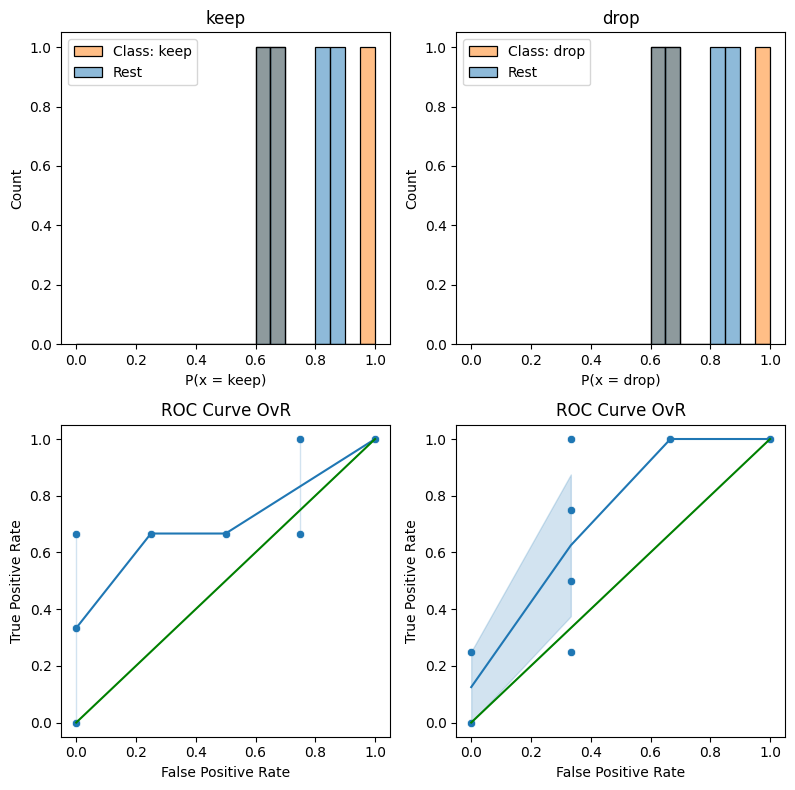

In [52]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
plt.figure(figsize = (12, 8))
bins = [i/20 for i in range(20)] + [1]
roc_auc_ovr = {}

classes = ['keep', 'drop']
for i in range(len(classes)):
    # Gets the class
    c = classes[i]
    
    # # Prepares an auxiliar dataframe to help with the plots
    # df_aux = X_test.copy()
    # df_aux['class'] = [1 if y == c else 0 for y in y_test]
    # df_aux['prob'] = y_proba[:, i]
    # df_aux = df_aux.reset_index(drop = True)
    
    # Plots the probability distribution for the class and the rest
    ax = plt.subplot(2, 3, i+1)
    sns.histplot(x = "prob_top_1", data = df, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(2, 3, i+4)
    plot_roc_curve(tprs[i], fprs[i], scatter = True, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    # roc_auc_ovr[c] = roc_auc_score(df['class'], df['prob_top_1'])
    
plt.tight_layout()

In [33]:
import pandas as pd
import plotly.express as px

# Create an example dataframe
# data = {'class': [0, 1, 1, 1, 0, 1, 0], 'prob_top_1': [0.8, 0.6, 0.01, 0.7, 0.3, 0.4, 0.9]}
# df = pd.DataFrame(data)

# Create a histogram using Plotly Express
histogram = px.histogram(df, x='prob_top_1', color='class', nbins=20, opacity=0.6)

# Set the layout for the histogram
hist_layout = dict(title='Histogram', xaxis_title='Probability', yaxis_title='Count')

# Create a figure for the histogram
fig = px.histogram(df, x='prob_top_1', color='class', nbins=20, opacity=0.6, barmode='overlay', 
                   title='Histogram', labels={'prob_top_1': 'Probability', 'class': 'Class'})

# Show the figure
fig.show()


In [30]:
# Create a plotly graph of the ROC curve and the AUROC curve for each class
fig = go.Figure()

fig.add_trace(go.Scatter(x=fprs[0], y=tprs[0], name=f'ROC Curve Class'))
fig.add_trace(go.Scatter(x=[0,1], y=[0, 1], name=f'Reference Line'))

# Update the layout of the graph
fig.update_layout(title='ROC and AUROC Curves', xaxis_title='False Positive Rate', yaxis_title='True Positive Rate')
fig.show()

In [38]:
import numpy as np
import plotly.graph_objs as go

# Generate some example data
x1 = np.random.randn(1000)
x2 = np.random.randn(1000) + 1.5

# Create histogram traces
histogram1 = go.Histogram(x=x1, nbinsx=20, histnorm='probability', opacity=0.6, name='X1', marker=dict(color='#1f77b4'))
histogram2 = go.Histogram(x=x2, nbinsx=20, histnorm='probability', opacity=0.6, name='X2', marker=dict(color='#ff7f0e'))

# Combine the histogram traces into a single data object
data = [histogram1, histogram2]

# Create a layout for the histogram
hist_layout = go.Layout(title='Histogram', xaxis_title='Value', yaxis_title='Probability', barmode='overlay', 
                        bargap=0.1, bargroupgap=0.1, font=dict(family='Arial', size=16), 
                        plot_bgcolor='#F9F9F9', paper_bgcolor='#F9F9F9')

# Create a figure for the histogram
fig_hist = go.Figure(data=data, layout=hist_layout)

# Show the figure
fig_hist.show()


In [46]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create example data
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]

# Create the histogram using px
fig1 = px.histogram(x=x, nbins=10, opacity=0.6, title='Histogram')

# Create the scatter plot using go
fig2 = go.Figure(data=[go.Scatter(x=x, y=y, name='Scatter Plot')])

# Combine the two figures into a single figure with two subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

fig.add_trace(fig_hist.data[1], row=1, col=1)
fig.add_trace(fig_hist.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=2, col=1)

fig.update_layout(height=600, title='Combined Figure', width=600)

fig.show()
